In [1]:
import numpy as np
import torch
from train_rootspike_glm import train_glm
import matplotlib.pyplot as plt

# Train

In [2]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust4-60"
cell_type = "CA1"

E_neural_file = "Espikes_neural.npy"
I_neural_file = "Ispikes_neural.npy"
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy"
C_syn_e_file = "handsub6_C_syn_e.npy"
C_syn_i_file = "handsub6_C_syn_i.npy"
C_den_file = "handsub6_C_den.npy"
Z_file = "spk_loc.npy"

E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:50000].flatten()
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)
Z = np.load(base_dir+cell_type+"_"+experiment+"/data/"+Z_file).flatten()

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
V = torch.from_numpy(V)
C_den = torch.from_numpy(C_den)
Z = torch.from_numpy(Z)

In [3]:
model_type = "alpha_rootspike"
T_train = 60 * 1000 * 5
T_test = 10 * 1000 * 5
T_no = 500
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")


if model_type == "alpha_rootspike":
    batch_size = 100000
    iter_no = 20000
    epoch_no = 15
    lr = 0.001



In [4]:
train_glm(model_type, V, Z, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, iter_no, epoch_no, C_den, C_syn_e, C_syn_i, 
                device, lr, save_dir)

327


2499 0.48918914794921875 0.2644746005535126 123.0 446.0
4999 0.8302391767501831 0.015613026916980743 123.0 102.0
7499 0.8805143237113953 0.015126735903322697 123.0 121.0
9999 0.8959399461746216 0.015302861109375954 123.0 94.0
12499 0.9012183547019958 0.015249967575073242 123.0 119.0
14999 0.9022220969200134 0.015235327184200287 123.0 98.0
17499 0.9015612602233887 0.01518914382904768 123.0 117.0
19999 0.9068664312362671 0.015150824561715126 123.0 101.0

0.9039619565010071
0.17288586
9 105


In [18]:
model_type = "alpha_rootspike"

In [5]:
output = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/"+model_type+"_sub6_output.npz")

In [6]:
test = output["test"]
#C_syn_e = output["C_syn_e"]
#C_syn_i = output["C_syn_i"]
filters = output["filters"]

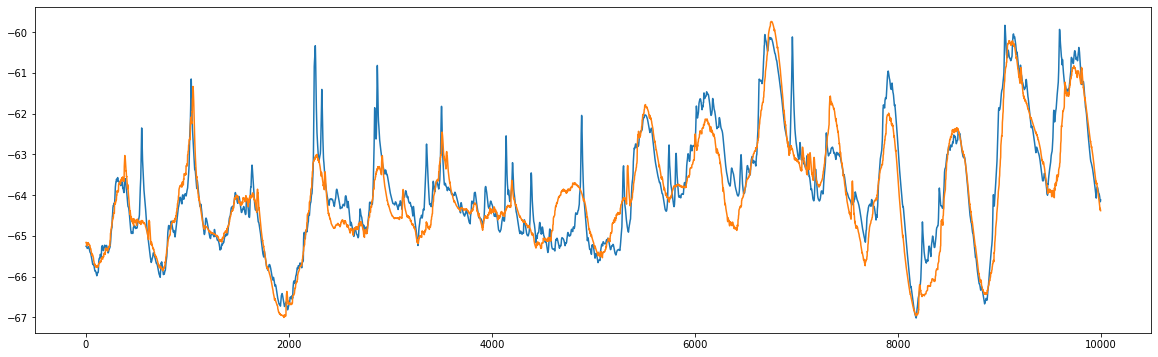

In [8]:
plt.figure(figsize = (20,6))
plt.plot(V[T_train:T_train+T_test][16000:26000][:])
plt.plot(test[16000:26000][:])


(26, 500)


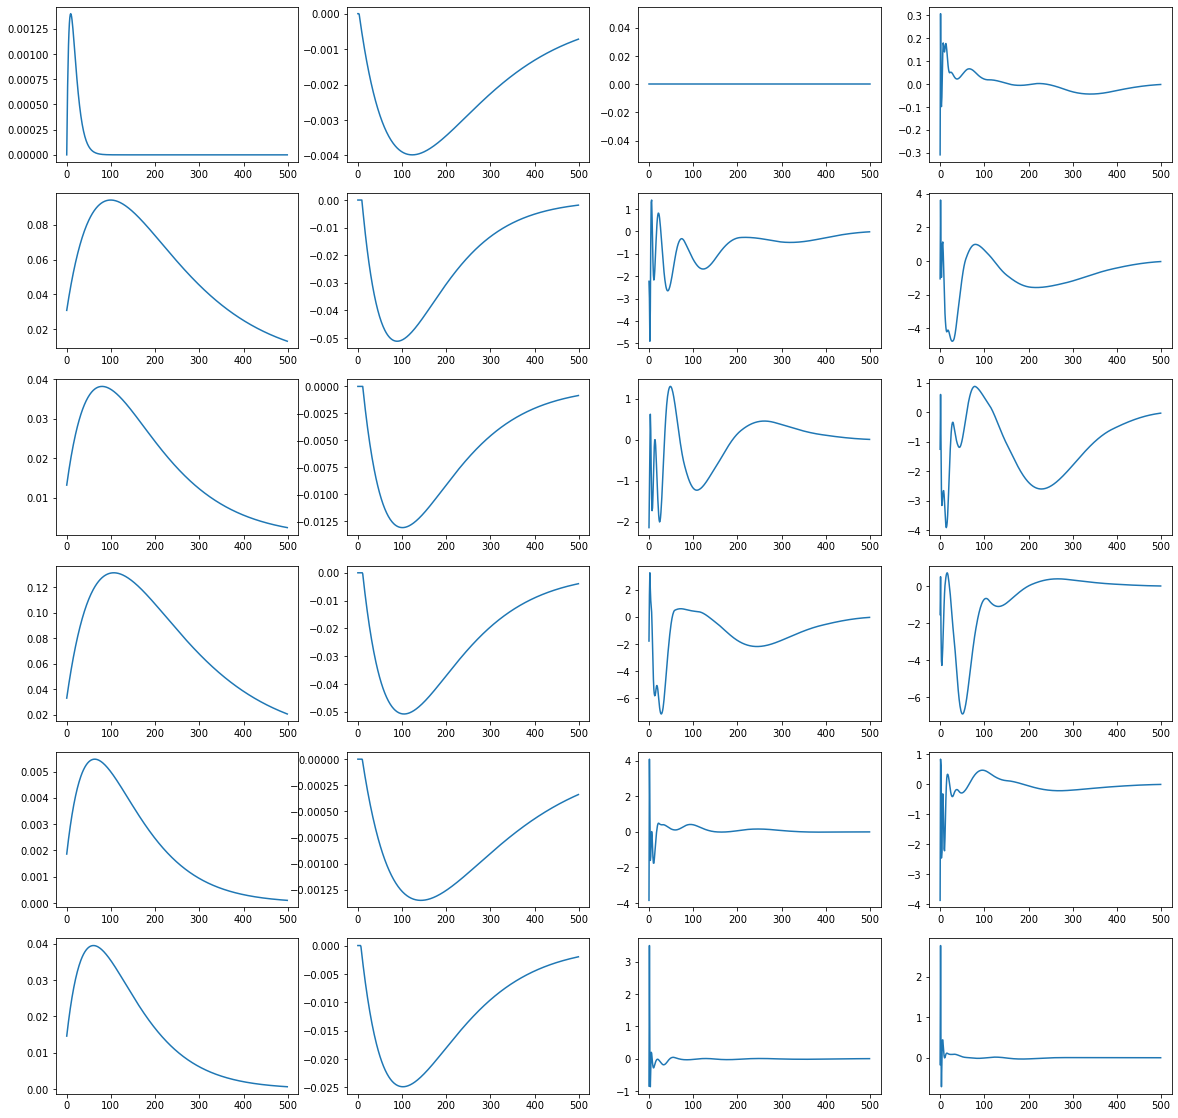

In [12]:
sub_no = 6
print(filters.shape)

fig, axs = plt.subplots(nrows=sub_no, ncols=4, figsize = (20,20))
for i in range(sub_no):
    axs[i,0].plot(filters[i])
    axs[i,1].plot(filters[sub_no+i])
    axs[i,2].plot(filters[2*sub_no+i][:])
    axs[i,3].plot(filters[3*sub_no+i][:])
    #axs[i,2].plot(filters[sub_no*2+i])

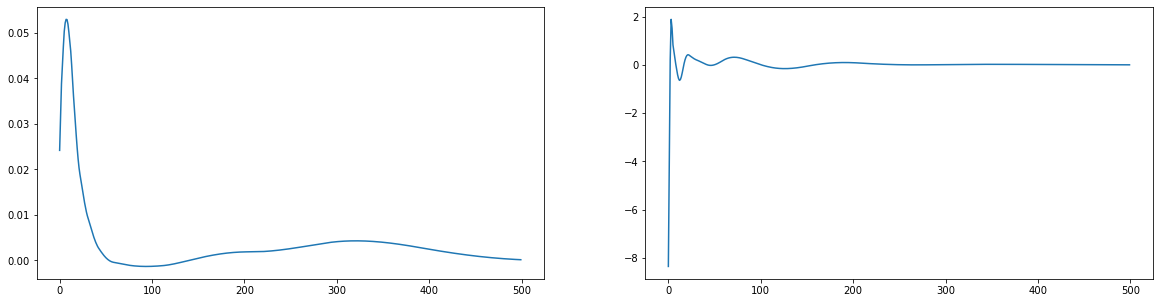

In [15]:
fig, axs = plt.subplots(ncols=2, figsize = (20,5))
axs[0].plot(filters[-2][:])
axs[1].plot(filters[-1][:])